In [1]:
# Filter EEG and label files
import os
import re
import glob
import numpy as np
data_dir = "/home/glab/Desktop/gruendemann2/Amine/full_sleep_data/"

def numerical_sort(filename):
    # Extract the number in the filename using a regular expression
    numbers = re.findall(r'(\d+)', filename)
    return [int(num) for num in numbers]

#all_files = os.listdir(data_dir)
eeg_files = sorted(glob.glob(data_dir + '*eegeegmove4model_eeg.npy'), key=numerical_sort)

label_files = sorted(glob.glob(data_dir + '*eegeegmove4model_label.npy'), key=numerical_sort)

#print(eeg_files)
#print(label_files)
###Sanity check
for file in range(len(eeg_files)):
    eeg = np.load(os.path.join(data_dir, eeg_files[file]))
    labels = np.load(os.path.join(data_dir, label_files[file]))
    print(eeg.shape, labels.shape)

(568, 9, 1280, 3) (568,)
(447, 9, 1280, 3) (447,)
(465, 9, 1280, 3) (465,)
(337, 9, 1280, 3) (337,)
(506, 9, 1280, 3) (506,)
(569, 9, 1280, 3) (569,)
(518, 9, 1280, 3) (518,)
(835, 9, 1280, 3) (835,)
(381, 9, 1280, 3) (381,)
(480, 9, 1280, 3) (480,)
(571, 9, 1280, 3) (571,)
(509, 9, 1280, 3) (509,)
(473, 9, 1280, 3) (473,)
(513, 9, 1280, 3) (513,)
(445, 9, 1280, 3) (445,)
(380, 9, 1280, 3) (380,)
(325, 9, 1280, 3) (325,)
(349, 9, 1280, 3) (349,)
(271, 9, 1280, 3) (271,)
(294, 9, 1280, 3) (294,)
(459, 9, 1280, 3) (459,)
(416, 9, 1280, 3) (416,)
(378, 9, 1280, 3) (378,)
(285, 9, 1280, 3) (285,)
(255, 9, 1280, 3) (255,)
(357, 9, 1280, 3) (357,)
(303, 9, 1280, 3) (303,)
(568, 9, 1280, 3) (568,)
(651, 9, 1280, 3) (651,)
(551, 9, 1280, 3) (551,)
(384, 9, 1280, 3) (384,)
(499, 9, 1280, 3) (499,)
(410, 9, 1280, 3) (410,)
(648, 9, 1280, 3) (648,)
(495, 9, 1280, 3) (495,)
(615, 9, 1280, 3) (615,)
(348, 9, 1280, 3) (348,)
(550, 9, 1280, 3) (550,)
(513, 9, 1280, 3) (513,)
(473, 9, 1280, 3) (473,)


In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from utils import z_score_normalize
from sklearn.metrics import classification_report  # For classification report
train_eeg_data = None
train_labels = None
val_eeg_data = None
val_labels = None
# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

test_index=22



# List all files in the directory

for file in range(len(eeg_files)):
        if 1 != 2:  # Exclude the current test index
            # Load EEG data
            eeg = np.load(os.path.join(data_dir, eeg_files[file]))
            
            # Exclude the first 8 blocks and keep only the last block (block 9)
            eeg = eeg[:, -1, :, :]  # Shape: (n_samples, 1280, 3)
            
            # Exclude the third channel (keep only the first two channels)
            eeg = eeg[:, :, :2]  # Shape: (n_samples, 1280, 2)
            for channel in range(eeg.shape[2]):  # Iterate over channels
                eeg[:, :, channel] = z_score_normalize(eeg[:, :, channel])
            
            # Load labels
            label = np.load(os.path.join(data_dir, label_files[file]))
            label[label == 3] = 2
            print(eeg.shape, label.shape)

            # Stack EEG data under each other
            if train_eeg_data is None:
                train_eeg_data = eeg
                
            else:
                train_eeg_data = np.vstack((train_eeg_data, eeg))

            # Stack labels under each other
            if train_labels is None:
                train_labels = label
            else:
                train_labels = np.hstack((train_labels, label))


     

Using device: cuda
(568, 1280, 2) (568,)
(447, 1280, 2) (447,)
(465, 1280, 2) (465,)
(337, 1280, 2) (337,)
(506, 1280, 2) (506,)
(569, 1280, 2) (569,)
(518, 1280, 2) (518,)
(835, 1280, 2) (835,)
(381, 1280, 2) (381,)
(480, 1280, 2) (480,)
(571, 1280, 2) (571,)
(509, 1280, 2) (509,)
(473, 1280, 2) (473,)
(513, 1280, 2) (513,)
(445, 1280, 2) (445,)
(380, 1280, 2) (380,)
(325, 1280, 2) (325,)
(349, 1280, 2) (349,)
(271, 1280, 2) (271,)
(294, 1280, 2) (294,)
(459, 1280, 2) (459,)
(416, 1280, 2) (416,)
(378, 1280, 2) (378,)
(285, 1280, 2) (285,)
(255, 1280, 2) (255,)
(357, 1280, 2) (357,)
(303, 1280, 2) (303,)
(568, 1280, 2) (568,)
(651, 1280, 2) (651,)
(551, 1280, 2) (551,)
(384, 1280, 2) (384,)
(499, 1280, 2) (499,)
(410, 1280, 2) (410,)
(648, 1280, 2) (648,)
(495, 1280, 2) (495,)
(615, 1280, 2) (615,)
(348, 1280, 2) (348,)
(550, 1280, 2) (550,)
(513, 1280, 2) (513,)
(473, 1280, 2) (473,)
(494, 1280, 2) (494,)
(571, 1280, 2) (571,)
(524, 1280, 2) (524,)
(365, 1280, 2) (365,)
(591, 1280, 2

In [3]:
import torch

# Convert train_eeg_data and train_labels to PyTorch tensors
train_eeg_data = torch.tensor(train_eeg_data, dtype=torch.float32).to(device)  # Convert to float32 for input data
train_labels = torch.tensor(train_labels, dtype=torch.long).to(device)  # Convert to long (int64) for labels


### Model Training

In [7]:
train_eeg_data = torch.tensor(train_eeg_data, dtype=torch.float32).to(device)
train_labels = torch.tensor(train_labels, dtype=torch.long).to(device)
from eegnet import EEGNet
device='cuda'
    # Compute class weights
class_counts = np.bincount(train_labels.cpu().numpy())
class_weights = 1.0 / class_counts  # Inverse of class counts
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

    # Create DataLoader for training and validation
train_dataset = TensorDataset(train_eeg_data, train_labels)
    #val_dataset = TensorDataset(val_eeg_data, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    #val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

    # Initialize the model and move it to the device
model = EEGNet(F1=32, F2=8, D=2, dropout_rate=0.1604465584506531, num_classes=3).to(device)

    # Define loss function with class weights
criterion = nn.CrossEntropyLoss()

    # Define optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=0.000749784767, weight_decay=0.00021416718031719688)
    # Training loop
num_epochs = 500
losses =[]
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_eeg, batch_labels in train_loader:
        # Forward pass
        outputs = model(batch_eeg)
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # Update learning rate
        #scheduler.step()
    print('epoch ', epoch, ' loss: ', epoch_loss/len(train_loader))
    losses.append(epoch_loss/len(train_loader))


model_save_path = "best_model_10s.pth"
torch.save(model.state_dict(), model_save_path)
print("Model saved")

/tmp/ipykernel_1251299/3189083718.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_eeg_data = torch.tensor(train_eeg_data, dtype=torch.float32).to(device)
/tmp/ipykernel_1251299/3189083718.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.long).to(device)


epoch  0  loss:  0.15763158813801698
epoch  1  loss:  0.09646201789521448
epoch  2  loss:  0.09407615104142539
epoch  3  loss:  0.08947489607139622
epoch  4  loss:  0.08760813767800019
epoch  5  loss:  0.08746183899402461
epoch  6  loss:  0.08443392243092944
epoch  7  loss:  0.08494472789375992
epoch  8  loss:  0.08249761121618795
epoch  9  loss:  0.08303906086905512
epoch  10  loss:  0.08244496310923397
epoch  11  loss:  0.0832618541444692
epoch  12  loss:  0.08117591577847895
epoch  13  loss:  0.08237478284914033
epoch  14  loss:  0.08058298685640027
epoch  15  loss:  0.07876805847424061
epoch  16  loss:  0.0793695311716439
epoch  17  loss:  0.08143642062170726
epoch  18  loss:  0.08170750855513594
epoch  19  loss:  0.0821688386766603
epoch  20  loss:  0.07978260642044445
epoch  21  loss:  0.07908087150090098
epoch  22  loss:  0.07759152663379684
epoch  23  loss:  0.08042290283326814
epoch  24  loss:  0.07927182630082986
epoch  25  loss:  0.07777908124629891
epoch  26  loss:  0.07659

epoch  214  loss:  0.06369681891331352
epoch  215  loss:  0.06540822095569256
epoch  216  loss:  0.06308330755483808
epoch  217  loss:  0.06090083049369433
epoch  218  loss:  0.06149532111010443
epoch  219  loss:  0.062172747173672493
epoch  220  loss:  0.06340386038158782
epoch  221  loss:  0.062306244729848935
epoch  222  loss:  0.06073815213783994
epoch  223  loss:  0.060253861607650575
epoch  224  loss:  0.06717661594226079
epoch  225  loss:  0.06386931196377527
epoch  226  loss:  0.06332241786810944
epoch  227  loss:  0.060928983811870764
epoch  228  loss:  0.06080913704967978
epoch  229  loss:  0.06223677571799507
epoch  230  loss:  0.06422579502793863
epoch  231  loss:  0.0636951612241067
epoch  232  loss:  0.06279357210944427
epoch  233  loss:  0.0619272593961119
epoch  234  loss:  0.06111082758335242
epoch  235  loss:  0.06293411940667037
epoch  236  loss:  0.06159862306019021
epoch  237  loss:  0.0620584408251119
epoch  238  loss:  0.06174215674683955
epoch  239  loss:  0.061

epoch  424  loss:  0.0560652522026259
epoch  425  loss:  0.05807027036240603
epoch  426  loss:  0.05900219242042859
epoch  427  loss:  0.06136271118233857
epoch  428  loss:  0.06093128385491038
epoch  429  loss:  0.060888053174117725
epoch  430  loss:  0.05873121253095783
epoch  431  loss:  0.05969787585154044
epoch  432  loss:  0.057543564392516754
epoch  433  loss:  0.05783440423113472
epoch  434  loss:  0.060102516679678024
epoch  435  loss:  0.05851623802302727
epoch  436  loss:  0.05671606432380421
epoch  437  loss:  0.05975574858995631
epoch  438  loss:  0.0604998420614281
epoch  439  loss:  0.05897307666816624
epoch  440  loss:  0.059290681851232076
epoch  441  loss:  0.059624594071460216
epoch  442  loss:  0.05951075487064171
epoch  443  loss:  0.05960299453006053
epoch  444  loss:  0.05809032126288069
epoch  445  loss:  0.06107424844841752
epoch  446  loss:  0.05873835964062883
epoch  447  loss:  0.05888067805896702
epoch  448  loss:  0.05947659699094677
epoch  449  loss:  0.0

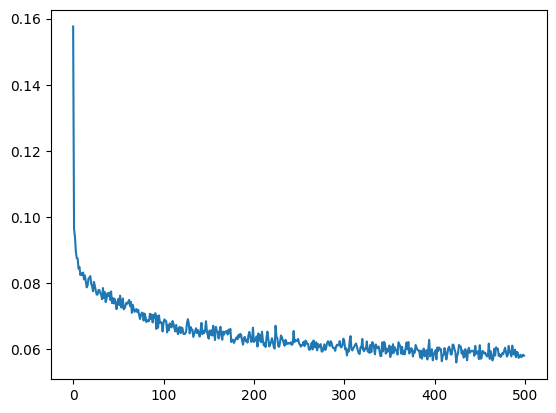

In [8]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()